### Geopandas 静态可视化（基于 Matplotlib）

gpd.plot() 的核心参数围绕地理要素的展示样式和属性关联，常用参数如下：
参数	|作用	|示例
|----|----|----|
ax	|指定绘图的 Matplotlib 子图（axes 对象），用于多图布局	|gdf.plot(ax=ax1)
column	|按指定属性列着色（数值型 / 分类型）	|gdf.plot(column='population')
cmap	|颜色映射（与 Matplotlib 兼容）	|cmap='YlOrRd'（黄到红）
categorical	|是否按分类数据着色（column 为分类型时需设为 True）	|categorical=True
legend	|是否显示图例	|legend=True
scheme	|数值型数据的分级方式（如 'quantiles' 分位数、'naturalbreaks' 自然断点）|	scheme='quantiles', k=5（分 5 级）
edgecolor	|要素边界颜色（面要素常用）	|edgecolor='black'
linewidth	|边界线宽（面 / 线要素）	|linewidth=0.5
markersize	|点要素的大小	|markersize=10
alpha	|透明度（0-1）	|alpha=0.7

### 静态专题地图，以gpd内置世界地图数据naturalearth_lowres为例

In [1]:
#导入包
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
#加载国家数据
world = gpd.read_file(r'C:\Users\86177\Desktop\geo\data\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp')
#加载排放点数据
populated = gpd.read_file(r'C:\Users\86177\Desktop\geo\data\ne_110m_populated_places\ne_110m_populated_places.shp')

In [3]:
#添加经纬度列
world['longitude'] = world.geometry.centroid.x
world['latitude'] = world.geometry.centroid.y

C:\Users\86177\AppData\Local\Temp\ipykernel_20876\4055018761.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['longitude'] = world.geometry.centroid.x
C:\Users\86177\AppData\Local\Temp\ipykernel_20876\4055018761.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['latitude'] = world.geometry.centroid.y


In [4]:
#获取world和populated的投影坐标系
print("World CRS:", world.crs)
print("Populated CRS:", populated.crs)
#重投影
world_6933 = world.to_crs(epsg=6933)  
populated_6933 = populated.to_crs(epsg=6933) 

World CRS: EPSG:4326
Populated CRS: EPSG:4326


In [5]:
# 提取质心
world_6933['centroid'] = world_6933.geometry.centroid
#提取边界线
world_6933['boundry']= world_6933.geometry.boundary

In [6]:
#对world计算面积
world_6933["area_km2"] = world_6933.geometry.area / 1_000_000

world_6933.sort_values(by="area_km2", ascending=False, inplace=True)
display(world_6933.head())

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,longitude,latitude,centroid,boundry,area_km2
18,Admin-0 country,1,2,Russia,RUS,0,2,Sovereign country,1,Russia,...,None,None,None,None,"MULTIPOLYGON (((17244539.384 6943050.758, 1736...",96.803318,61.961663,POINT (9207854.001 6323249.026),"MULTILINESTRING ((17244539.384 6943050.758, 17...",1.702059e+07
159,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,None,None,None,None,"MULTIPOLYGON (((-4695081.834 -7181649.88, -464...",20.571001,-80.491983,POINT (3439104.947 -7106528.66),"MULTILINESTRING ((-4695081.834 -7181649.88, -4...",1.233777e+07
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,"MULTIPOLYGON (((-11852374.666 5530553.823, -11...",-98.142381,61.469076,POINT (-9421389.33 6193306.233),"MULTILINESTRING ((-11852374.666 5530553.823, -...",1.003773e+07
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,"MULTIPOLYGON (((-11852374.666 5530553.823, -11...",-112.599436,45.705628,POINT (-10376590.831 4907899.995),"MULTILINESTRING ((-11852374.666 5530553.823, -...",9.509851e+06
139,Admin-0 country,1,2,China,CH1,1,2,Country,1,China,...,None,None,None,None,"MULTIPOLYGON (((10562855.753 2283699.831, 1048...",103.883612,36.555067,POINT (9999068.28 4260549.575),"MULTILINESTRING ((10562855.753 2283699.831, 10...",9.409565e+06


IndexError: index 1 is out of bounds for axis 0 with size 1

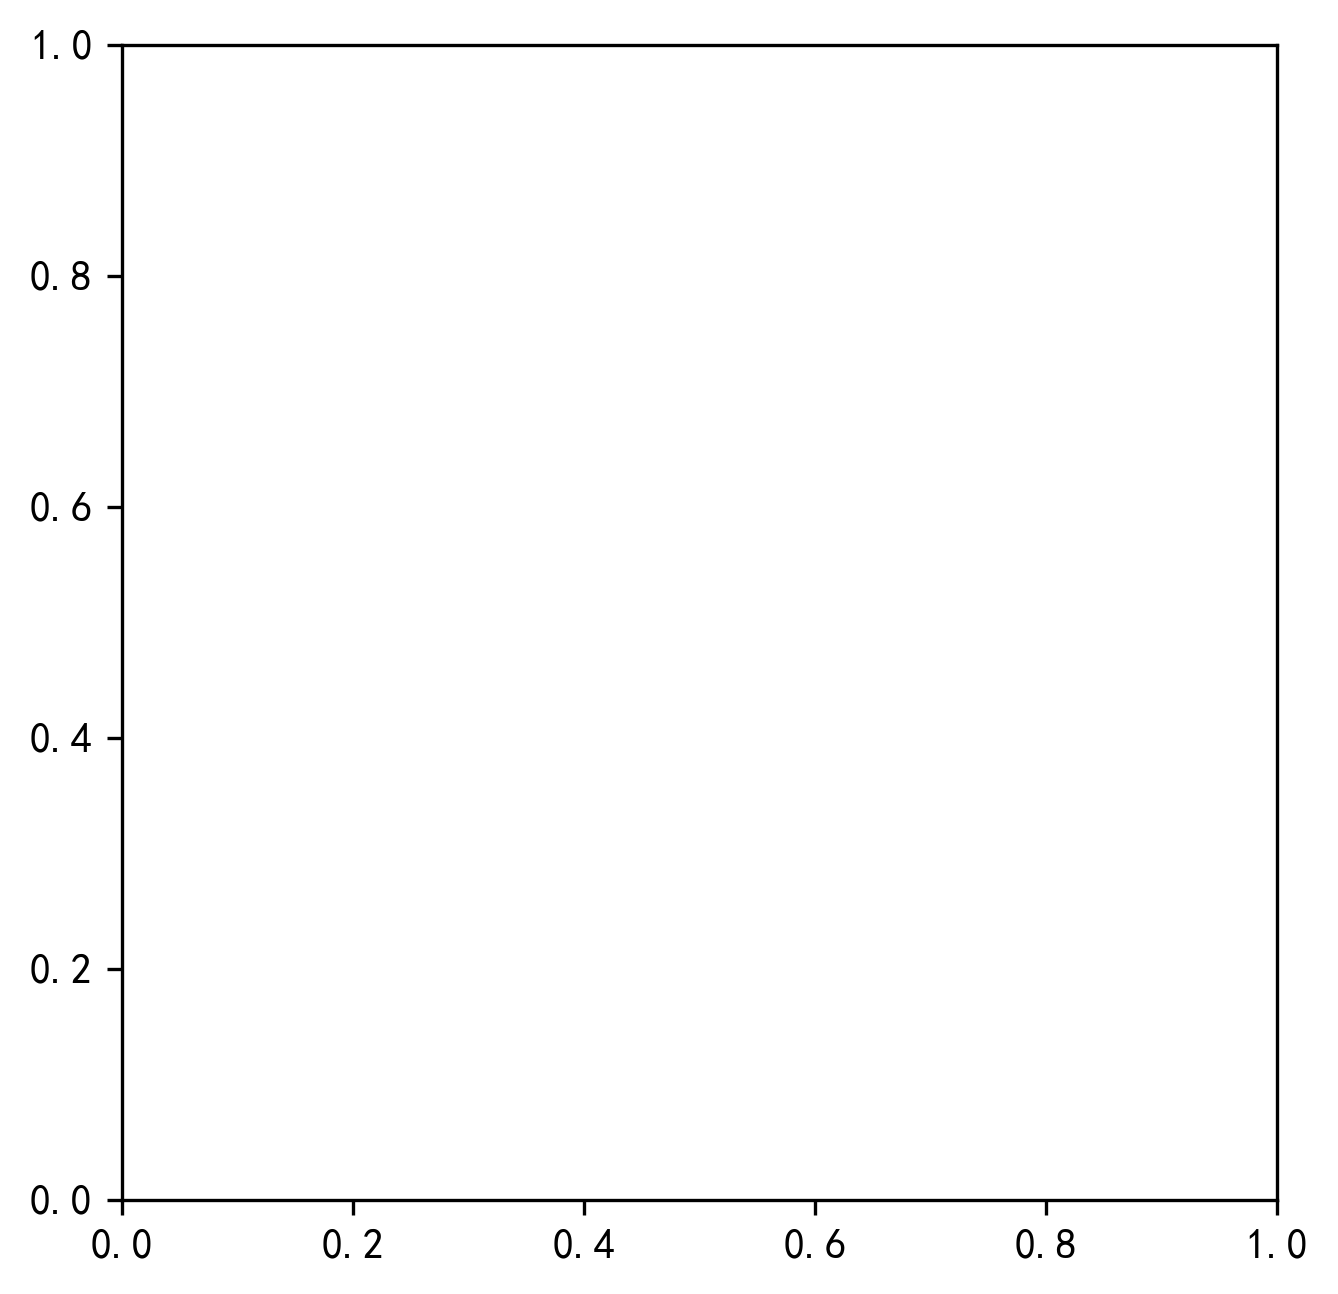

In [ ]:

import matplotlib.ticker as mticker
import matplotlib as mpl
# 设置全局字体为SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决坐标轴负号显示问题
plt.rcParams['axes.unicode_minus'] = False

#基于matplotlib绘图
# 设置高分辨率以获得更好质量的图形
plt.rcParams["figure.dpi"] = 300
# 创建地图
fig=plt.figure(figsize=(10,5))
axes = fig.add_subplot(1,1,1)
world_6933.plot(ax=axes,column='area_km2', cmap='viridis', edgecolor='black', linewidth=0.5,legend=True,legend_kwds={'title': 'area_KM2'},
    cbar_kws={
        'orientation': 'horizontal', # 水平方向
        'pad': 0.02,                 # 距离地图的距离
        'shrink': 0.6,               # 缩小 colorbar 长度
        'label': 'Area (km²)'       # 也可以在这里设置 label，会覆盖 legend_kwds 的 title
    },)
#colorbar
#fig.colorbar(axes.collections[0], ax=axes, orientation='horizontal', pad=0.02, label='Area (km²)', fraction=0.05, aspect=50)
#隐藏坐标轴
axes.set_axis_off()
#标题
axes.set_title("World Countries by Area", fontsize=16)
axes.set_xlabel("Longitude", fontsize=12)
axes.set_ylabel("Latitude", fontsize=12)
plt.tight_layout()
plt.show()